In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as mpl

In [2]:
c2p3 = scipy.io.loadmat('c2p3.mat')
stim = c2p3['stim'].T
counts = c2p3['counts']
print(np.shape(stim))
print(np.shape((counts)))

(32767, 16, 16)
(32767, 1)


In [3]:
#Part A

def STA(step, stim, counts):
    total_spike = 0
    result = np.zeros((step, 16, 16))
    for i in range(len(stim[:,0,0])):
        for j in range(step):
            if i > j and counts[i] >= 0:
                result[j,:,:] += stim[i-(j+1),:,:] * counts[i]
        total_spike += counts[i]
    #Normalization
    result[:,:,:] = result[:,:,:] / total_spike
    return result

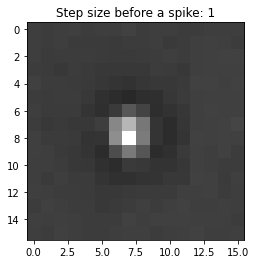

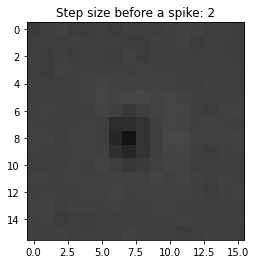

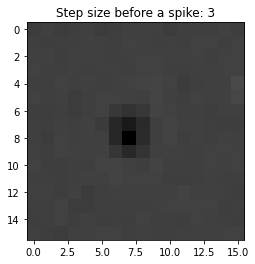

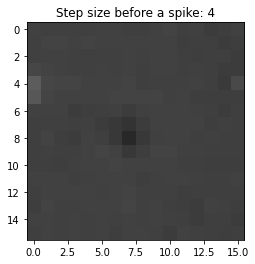

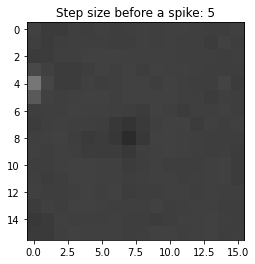

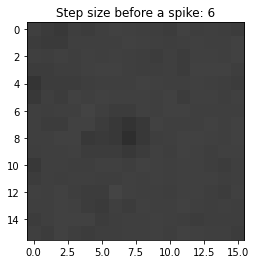

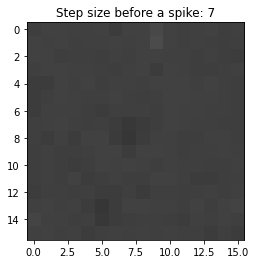

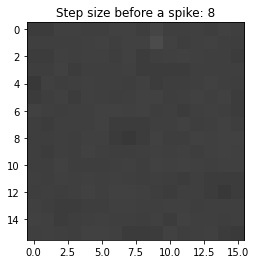

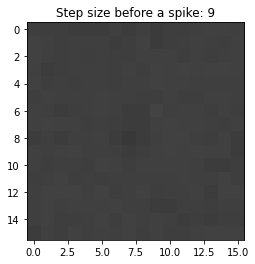

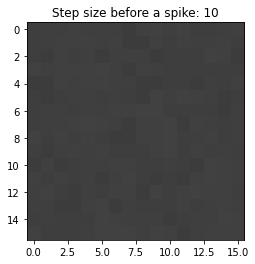

In [4]:
STA_image = STA(10,stim,counts)
figure = 0
for i in range(np.shape(STA_image)[0]):
    figure += 1
    mpl.figure(figure)
    mpl.title("Step size before a spike: " +str(i+1) )
    mpl.imshow(STA_image[i,:,:], cmap='gray', vmin=np.min(STA_image), vmax=np.max(STA_image))


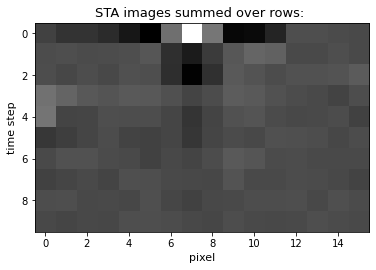

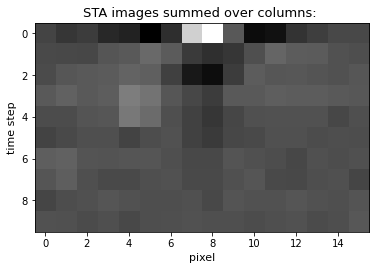

In [5]:
#Part B

row_sum = np.sum(STA_image, axis=1)
col_sum = np.sum(STA_image, axis=2)

figure += 1
mpl.figure(figure)
mpl.title("STA images summed over rows: ", fontsize=13)
mpl.xlabel('pixel', fontsize=11)
mpl.ylabel('time step', fontsize=11)
mpl.imshow(row_sum, cmap='gray')
mpl.show(block=False)

figure += 1
mpl.figure(figure)
mpl.title("STA images summed over columns: ", fontsize=13)
mpl.xlabel('pixel', fontsize=11)
mpl.ylabel('time step', fontsize=11)
mpl.imshow(col_sum, cmap='gray')
mpl.show(block=False)

In [6]:
#Part C

def frobenius(STA, stim, counts, allSpikes):
    if allSpikes == True:
        result = np.zeros(len(counts))
        normalizer = 0
        for i in range(len(counts)):
            result[i] = np.sum(np.multiply(STA[0,:,:],stim[i,:,:]))
            if result[i] > normalizer:
                normalizer = result[i]
        result[:] = result[:] / normalizer   
    else:
        result = []
        normalizer = 0
        for i in range(len(counts)):
            if counts[i] != 0:
                result.append(np.sum(np.multiply(STA[0,:,:],stim[i,:,:])))
        normalizer = max(result)
        result[:] = result[:] / normalizer  
    return result

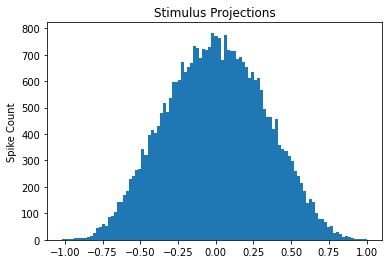

In [7]:
histo_frobenius = frobenius(STA_image, stim, counts, True)
figure += 1
mpl.figure(figure)
mpl.title("Stimulus Projections") 
mpl.ylabel('Spike Count')
mpl.hist(histo_frobenius, bins=100)
mpl.show()

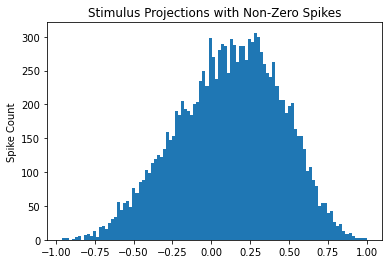

In [8]:
histo_frobenius_nonzero_spikes = frobenius(STA_image, stim, counts, False)
figure += 1
mpl.figure(figure)
mpl.title("Stimulus Projections with Non-Zero Spikes") 
mpl.hist(histo_frobenius_nonzero_spikes, bins=100)
mpl.ylabel('Spike Count')
mpl.show()

Text(0, 0.5, 'Spike Count')

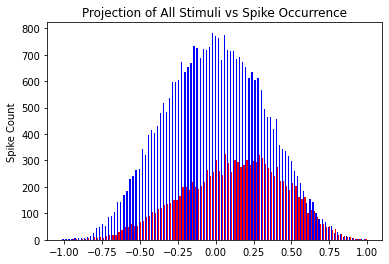

In [9]:
figure += 1
mpl.figure(figure)
mpl.hist([histo_frobenius,histo_frobenius_nonzero_spikes],bins=100,color=['blue','red'])
mpl.title("Projection of All Stimuli vs Spike Occurrence")
mpl.ylabel('Spike Count')